# Praca domowa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv("Animation_Movies.csv")

## 1. Opis zbioru danych

In [ ]:
# opis zbioru danych
print("Rozmiar zbioru danych:", df.shape)
print("\nLiczba braków danych:")
print(df.isnull().sum())
print("\nTypy zmiennych:")
print(df.dtypes)
print("\nLiczba typów zmiennych:")
print(df.dtypes.value_counts())

Rozmiar zbioru danych: (51945, 23)

Liczba braków danych:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

Typy zmiennych:
id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int6

## 2. Statystyki zmiennych liczbowych

Statystyki opisowe dla wszystkich kolumn liczbowych w zbiorze danych:
                  id  vote_average    vote_count       revenue       runtime  \
count  5.194500e+04  51945.000000  51945.000000  5.194500e+04  51945.000000   
mean   6.188122e+05      2.597083     40.395380  1.863464e+06     20.901415   
std    3.479748e+05      3.318748    482.705948  3.049824e+07     39.016002   
min    1.200000e+01      0.000000      0.000000  0.000000e+00      0.000000   
25%    3.300810e+05      0.000000      0.000000  0.000000e+00      3.000000   
50%    6.119150e+05      0.000000      0.000000  0.000000e+00      7.000000   
75%    9.159040e+05      6.000000      2.000000  0.000000e+00     19.000000   
max    1.238314e+06     10.000000  19463.000000  1.450027e+09   3720.000000   

             budget    popularity  vote_avg_rounded  
count  5.194500e+04  51945.000000      51945.000000  
mean   5.759513e+05      1.886233          2.598133  
std    7.606628e+06      9.700913          3.323705  
m

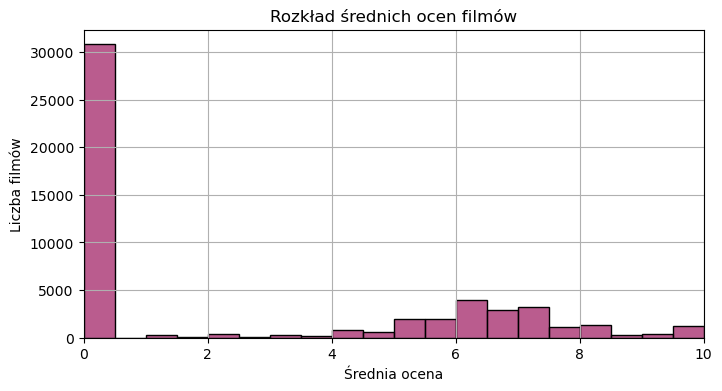

In [58]:
# statystyki zmiennych liczbowych
stats = df.select_dtypes(include=[np.number]).describe()
print("Statystyki opisowe dla wszystkich kolumn liczbowych w zbiorze danych:\n", stats)

# wykres - rozkład ocen
plt.figure(figsize=(8, 4))
sns.histplot(df['vote_average'].dropna(), bins=20, kde=False, color='#a32668')
plt.xlim(0, 10)
plt.title('Rozkład średnich ocen filmów')
plt.xlabel('Średnia ocena')
plt.ylabel('Liczba filmów')
plt.grid(True)
plt.show()

### Wnioski
Dane pokazują, że kolumny revenue i budget mają duże odchylenie standardowe i wiele zer. Wskazuje to na obecność wartości odstających i braków danych. Dodatkowo można zauważyć bardzo duże wartości w runtime, które mogą być błędne i wymagają sprawdzenia. Oprócz tego średnia ocena filmów jest niska, a mediana zerowa, co wskazuje na dużą ilość brakujących lub zerowych ocen. Ukazuje to także powyższy wykres.

## 3. Analiza zmiennych liczbowych według zmiennej jakościowej

Wartości średnie zmiennych liczbowych dla różnych języków oryginalnych:



,popularity,budget,revenue,vote_count
original_language,,,,
ja,4.169498,1.930856e+05,1.468887e+06,49.799812
th,2.228762,6.515712e+05,1.655933e+05,6.238095
en,2.012573,9.433493e+05,2.965478e+06,60.877869
ca,1.862833,4.187083e+02,1.025000e+01,0.833333
zu,1.762000,0.000000e+00,0.000000e+00,1.000000
da,1.704508,1.004292e+05,7.057988e+04,9.004167
os,1.573000,0.000000e+00,0.000000e+00,2.000000
ur,1.434250,1.996447e+06,1.076008e+05,3.062500
es,1.402647,1.315691e+05,1.661830e+05,6.873641


Wartości median zmiennych liczbowych dla różnych języków oryginalnych:



,popularity,budget,revenue,vote_count
original_language,,,,
zu,1.7620,0.0,0.0,1.0
os,1.5730,0.0,0.0,2.0
si,1.2650,250000.0,2040000.0,5.0
te,1.2410,0.0,0.0,1.0
ja,0.9760,0.0,0.0,1.0
pa,0.9610,0.0,0.0,1.0
ta,0.7775,0.0,0.0,0.0
ur,0.6990,0.0,0.0,1.0
nn,0.6570,7.0,0.0,0.5


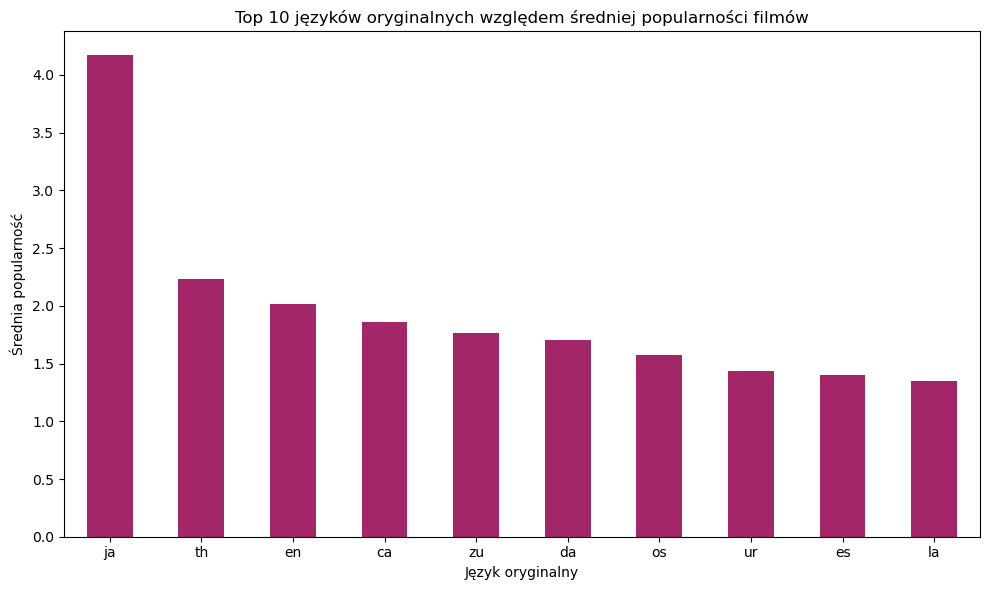

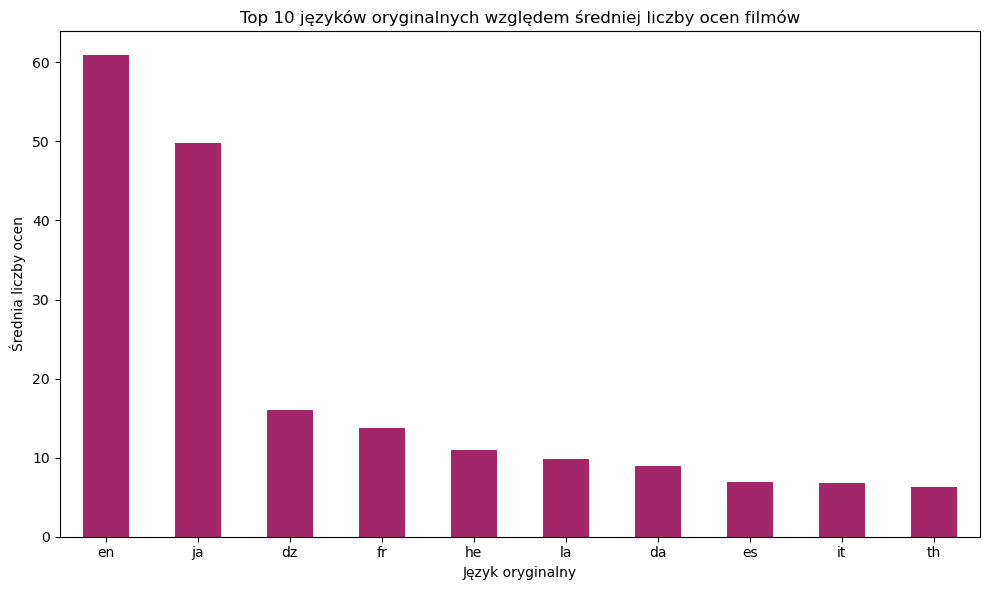

In [ ]:
# dane
numeric_cols = ['popularity', 'budget', 'revenue', 'vote_count']
df_lang_group = df[['original_language'] + numeric_cols].dropna()

# średnie
lang_stats_m = df_lang_group.groupby('original_language')[numeric_cols].mean()
print("Wartości średnie zmiennych liczbowych dla różnych języków oryginalnych:\n")
display(lang_stats_m.sort_values(by='popularity', ascending=False).head(27))

# mediany
lang_stats_med = df_lang_group.groupby('original_language')[numeric_cols].median()
print("Wartości median zmiennych liczbowych dla różnych języków oryginalnych:\n")
display(lang_stats_med.sort_values(by='popularity', ascending=False).head(27))

# wykres - popularność względem języka
plt.figure(figsize=(10, 6))
lang_stats_m['popularity'].sort_values(ascending=False).head(10).plot(kind='bar', color='#a32668')
plt.title('Top 10 języków oryginalnych względem średniej popularności filmów')
plt.xlabel('Język oryginalny')
plt.ylabel('Średnia popularność')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# wykres - ilość ocen względem języka
plt.figure(figsize=(10, 6))
lang_stats_m['vote_count'].sort_values(ascending=False).head(10).plot(kind='bar', color='#a32668')
plt.title('Top 10 języków oryginalnych względem średniej liczby ocen filmów')
plt.xlabel('Język oryginalny')
plt.ylabel('Średnia liczby ocen')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Wnioski
Wyniki pokazują, że największą średnią popularnością szczycą się filmy pochodzenia japońskiego. Dodatkowo widzimy, że patrząc na średnią liczbę ocen filmów najbardziej wyróżniają się filmy angielskie i japońskie. Oba te spostrzeżenia wskazują na większą popularność animowanych filmów japońskich i angielskich w porównaniu do filmów z innym oryginalnym językiem.

Natomiast patrząc na wartości median dla różnych zmiennych możemy zauważyć, że w większości języków mediana mediana budżetu jest równa 0 w niemal wszystkich językach, co sugeruje brak informacji o budżecie dla wielu filmów lub jest on bardzo niski podobny przypadek zachodzi dla przychodów filmów.

## 4. Analiza zmiennej jakościowej typu multilabel

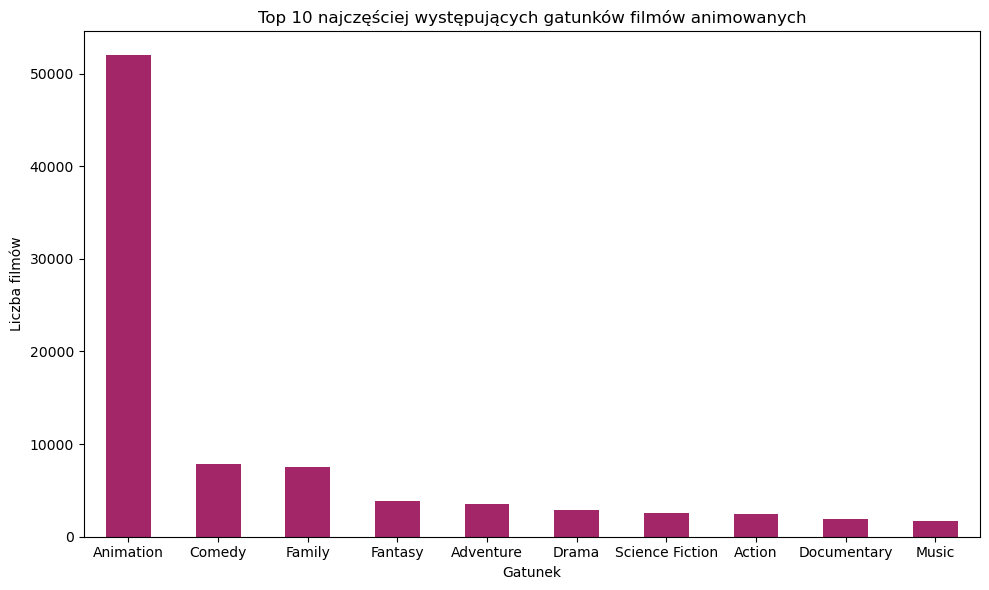

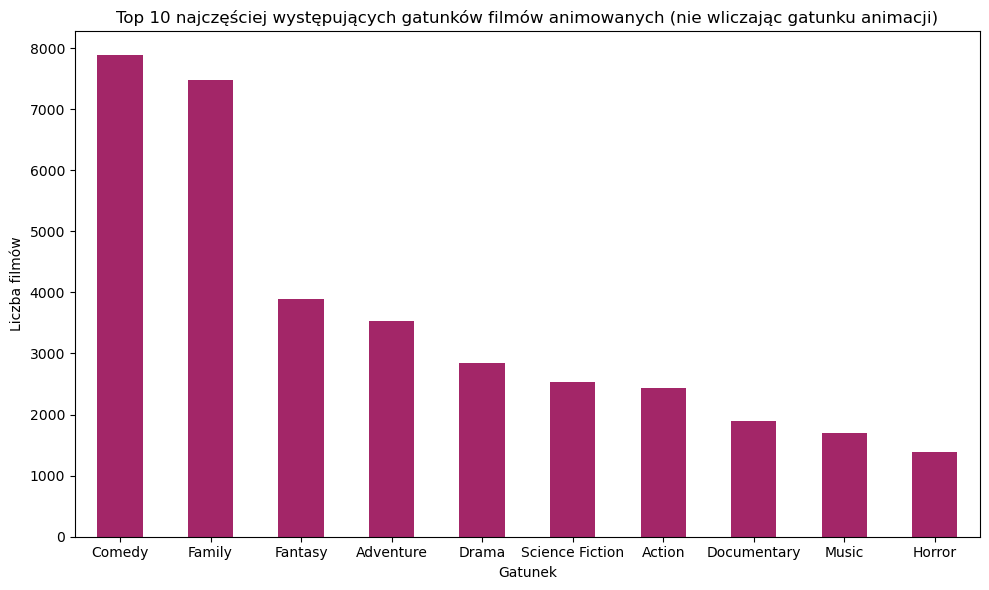

In [79]:
# usuwanie braków, rozbijanie zmiennej typu multilabel
genres_series = df['genres'].dropna().str.split(',').explode().str.strip()

# liczenie wystąpień każdego gatunku
genre_counts = genres_series.value_counts()

# wykres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='#a32668')
plt.title('Top 10 najczęściej występujących gatunków filmów animowanych')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# pomocniczy wykres - łatwiej odczytać gatunki wyłączając gatunek animacji, gdy rozważamy filmy animowane
plt.figure(figsize=(10, 6))
genre_counts.drop('Animation').head(10).plot(kind='bar', color='#a32668')
plt.title('Top 10 najczęściej występujących gatunków filmów animowanych (nie wliczając gatunku animacji)')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Wnioski
Dane dotyczą filmów animowanych, więc jest to dość logiczne, że najczęściej występującym gatunkiem będzie gatunek animacji. Z pomocniczego wykresu poniżej, gdzie został usunięty słupek odpowiadający za animacje, aby wykres był czytelniejszy, możemy także odczytać, że popularnymi gatunkami wśród filmów animowanych są komedie i filmy familijne. Jest to zgodne z naszymi pierwszymi skojarzeniami, gdy myślimy o filmach animowanych, które często są lekkimi filmami dla dzieci.

## 5. Analiza zależności pomiedzy wybranymi zmiennymi

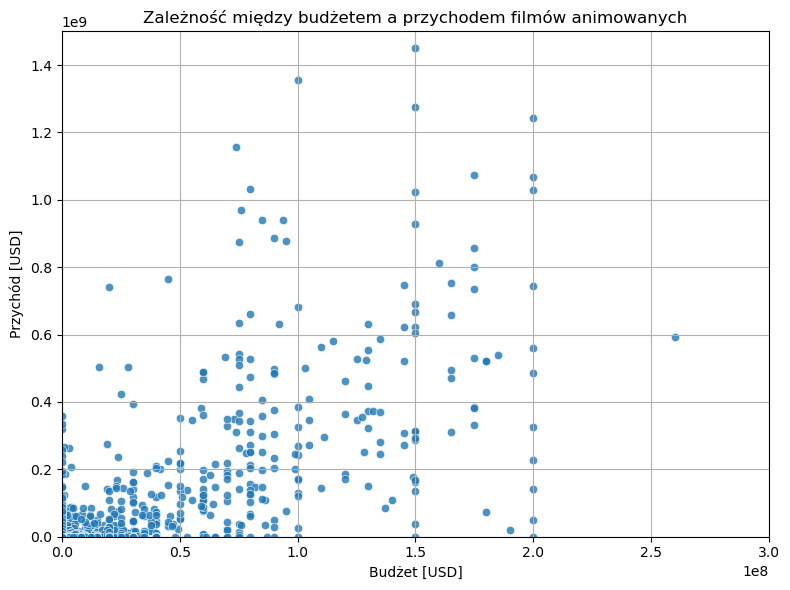

In [80]:
# wykres - zależność między budżetem a przychodem
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.8)
plt.title('Zależność między budżetem a przychodem filmów animowanych')
plt.xlabel('Budżet [USD]')
plt.ylabel('Przychód [USD]')
plt.xlim(0, 3e8)
plt.ylim(0, 1.5e9)
plt.grid(True)
plt.tight_layout()
plt.show()

### Wnioski
Większość filmów dysponuje stosunkowo niskim budżetem, zazwyczaj do 100 milionów dolarów, natomiast ich przychody są zróżnicowane. Można zauważyć, że wysoki budżet nie musi wcale się przekładać się na sukces — zdarza się, że nawet drogie produkcje generują niewielkie zyski. Jedynie nieliczne filmy osiągają przychody sięgające miliarda dolarów.

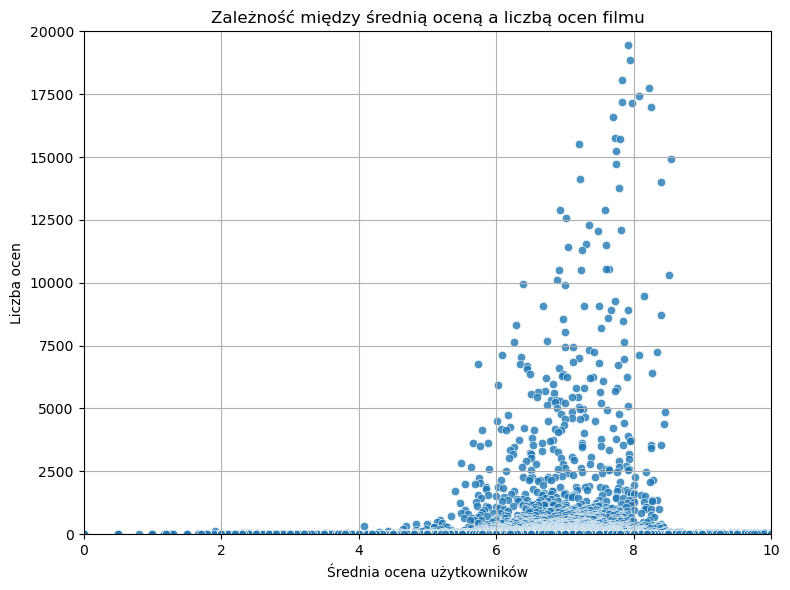

In [106]:
# wykres - zależność między średnią oceną a liczbą ocen
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='vote_average', y='vote_count', alpha=0.8)
plt.xlim(0, 10)
plt.ylim(0, 20000)
plt.title('Zależność między średnią oceną a liczbą ocen filmu')
plt.xlabel('Średnia ocena użytkowników')
plt.ylabel('Liczba ocen')
plt.grid(True)
plt.tight_layout()
plt.show()

### Wnioski
Filmy z dużą liczbą ocen są zazwyczaj dobrze oceniane, co sugeruje, że chętniej wyrażamy opinię o lubianych produkcjach. Jednocześnie, skrajnie wysokie lub niskie średnie oceny mają zwykle niewielką liczbę głosów, co pokazuje, że powszechna, jednolita zgoda co do wartości filmu jest rzadkością – opinie są zawsze zróżnicowane. Zatem w przypadku skrajnych wartości oceny będzie zazwyczaj bardzo mało - od osób uwielbiających dany film lub mających do niego urazę.